In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

### Task 2.1 Documentation

#### 1. Data Source:
- The data source for the Task 2.1 is a generated, random uniformly distributed sample of size n
- Responsibility for the correctness of generated data lays on the method uniform.rvs() (random values) of scipy.stats.uniform module
- H0: In this project I assume that the module scipy.stats.uniform is implemented correctly, and, according to the documentation, generates random uniformly distributed samples
- H0 (re-formulated): X is a uniformly distributed sample with values in range $[0,\theta]$ (where $\theta$ is a model parameter)

##### 2. Research purpose:

1. Given samples: 
  - $X \in \text{\{ X1, X2 , ..., X100 \}}$
  - Sample size:  $\small{\text{|X1| = 1000, |X2| = 2000, ... , |X100| = 100000}}$
0. Given three functions (statistics) over a sample X:
  - Min(X) = $\space\space X_{1:n}\space\space  -  $ Sample X minimum
  - Mean(X) = $\space\space (X_{1:n}, X_{n:n})\space\space  ---||--- \text{mean}$ 
  - Max(X) = $\space\space X_{n:n}\space\space  ---||--- \text{maximum}$
0. Given parameter $\theta = 10$ (or any natural number)
0. Null hypothesis, $\text{H0}$: $\space\space X \text{ ~ } \textit{Unif }[0, \theta]$
0. Null hypothesis, $\text{H0}$: $\textbf{Max(X)}\text{ is a sufficient statistics for the parameter }\theta$
0. Alternative hypothesis, $\text{H1}$: $\textbf{Mean(X)}\text{ is a sufficient statistics for the parameter }\theta$

In [2]:
#A helper class for printing colored text to the terminal

class bcolors:
    """Print colored text to the terminal"""
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    
def success(text):
    print(bcolors.OKGREEN + text + bcolors.ENDC)
    
def fail(text):
    print(bcolors.FAIL + text + bcolors.ENDC)

In [3]:
#Define theta
theta = 10

# Define sample (X) generator
def T(theta, sample_size):
    return uniform.rvs(0,theta,sample_size)

In [4]:
#Define statistics functions
def Mean(sample):
    return sample.mean()

def Min(sample):
    return sample.min()

def Max(sample):
    return sample.max()

##### 3. Classifier & numeric variables:
1. Classifiers:
  - $\text{None}$
2. Numeric variables:
  - $\space\space X \text{ ~ } \textit{Unif }[0, \theta]$

##### 4. Introduction (Probability distribution analysis)
1. The $\small{\textbf{Kolmogorov-Smirnov}}$ test is used to confirm / reject the Null hypothesis H0 (which assumes, that $\space\space X \text{ ~ } \textit{Unif }[0, \theta]$)
2. $\text{In the example below I used a function scipy.stats.kstest that implements the}\small{\textbf{ Kolmogorov-Smirnov }}\text{test.}$
3. A brief description of the solution:
  - method: scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', method='auto')
  - reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html
  - Performs the (one-sample or two-sample) Kolmogorov-Smirnov test for goodness of fit. The one-sample test compares the underlying distribution F(x) of a sample against a given distribution G(x) $\textbf{(this option is used)}$. The two-sample test compares the underlying distributions of two independent samples. Both tests are valid only for continuous distributions.
  - parameters:
    - rvs - random values $\equiv X$
    - cdf - expected cumulative distribution function $\equiv \text{Unif}(0,\theta)$
    - N - sample size $\equiv \text{size of } X$
    - If the sample comes from distribution $F(x) \equiv cdf$, then $D_n$ converges to 0 almost surely in the limit when ${\displaystyle n}$ goes to infinity.
    - H0: ${\sqrt {n}}D_{n} \space\space$ converges to the Kolmogorov distribution, which does not depend on $F(x)$
  - $D_{n}=\sup _{x}|F_{n}(x)-F(x)|$

In [43]:
from scipy.stats import kstest
Lambda = 0.05

n = 100000
test = kstest(T(theta,n),uniform.cdf, N=n, args=(0,theta))
s, p_value = test
print("sample size = %d"%n)
print()
print(test)
if (p_value>Lambda):
    print()
    print("H0 for the Kolmogorov-Smirnov test is correct, lambda = %.3f (%d%% percentile)"%(Lambda,100-100*Lambda))
    print()
    print("The sample X distribution is likely to be equivalent to Unif[0,theta]")
else:
    print("H0 for the Kolmogorov-Smirnov test is not correct, lambda = %.3f"%Lambda)
    print("X distribution is unlikely to be equivalent to Unif[0,theta]")

sample size = 100000

KstestResult(statistic=0.0024658160031407195, pvalue=0.576524495593717)

H0 for the Kolmogorov-Smirnov test is correct, lambda = 0.050 (95% percentile)

The sample X distribution is likely to be equivalent to Unif[0,theta]


4. The $\small{\textbf{Kolmogorov-Smirnov}}$ test is positive (95 percentile) =>
  - H0 is correct =>
  - X is a random sample with the distribution $ \equiv \text{Unif}(0,\theta)$


5. Additionally, it is necessary to check, that the sample generated by T is simple.<br>

- Therefore we define a function <b>isSimpleRandomSample(T, theta, expected_range, eps = $10^{-5}$)</b> - check if a uniformly distributed random
    variable T is a simple random sample given the expected range [a,b].</pre>
    1. Calculate the expected mean and standard deviation of the Uniform[a,b] distribution
    2. Iterate for each sample size =n min: $10$, max: $10^7$
    3. For each sample size (=n):
      - Generate a random sample of size n
      - Calculate [a_iter,b_iter] == [min(sample),max(sample)]
      - Compute p == P(x$\lt$a_iter or x$\gt$b_iter)
      - Calculate the sample mean and standard deviation
      - In order to prove that T(n) is a simple random sample, we need to check that the random variable T(n) is not limited for the population [0,theta]
      - Therefore, it is necessary and sufficient to check that lim(p)=0, n->inf for a given eps.
      - => If abs(p) < eps: T generates a simple random sample.
          - return True
    0. Else:
      - return False
</ol>

In [57]:
from math import sqrt

def isSimpleRandomSample(T, theta, expected_range, eps):
    a_iter=None
    b_iter=None
    diff = abs(expected_range[0]-expected_range[1])
    sample_sizes = [int(x) for x in [10,1e2,1e3,1e4,1e5,1e6, 1e7]]
    print("expected range:",expected_range)
    expected_mean = (expected_range[1]-expected_range[0])/2
    expected_std = sqrt(1/12 * (expected_range[1]-expected_range[0])**2)
    print("expected mean:",expected_mean)
    print("expected standard deviation:",expected_std)
    print()
    for size in sample_sizes:
        samp = T(theta, size)
        a_iter = samp.min()
        b_iter = samp.max()
        
        p = abs(a_iter-expected_range[0])/diff + abs(b_iter-expected_range[1])/diff
        print("for sample size = %d:"%size)
        print("p_value == P(x<a_iter or x>b_iter) = %.8f"%p)
        print("sample mean = E(X):",samp.mean())
        print("sample standard deviation = sqrt(Var(X)):",samp.std())
        print("actual range: ",[a_iter,b_iter])
        print()
        
        if p < eps:
            print("Random sample is simple, eps=%e"%eps)
            return True
    return False
    
eps=1e-5
population=[0,theta]

if isSimpleRandomSample(T,theta,population, eps=eps):
    success("\nT(n) generates a simple random sample for the expected population=%s, eps=%e"%(population,eps))
else:
    fail("\nT(n) does not generate a simple random sample for the expected population=%s, eps=%e"%(population,eps))

expected range: [0, 10]
expected mean: 5.0
expected standard deviation: 2.8867513459481287

for sample size = 10:
p_value == P(x<a_iter or x>b_iter) = 0.10368617
sample mean = E(X): 5.643999061499329
sample standard deviation = sqrt(Var(X)): 2.871822291800391
actual range:  [0.9269957357854164, 9.890134010618748]

for sample size = 100:
p_value == P(x<a_iter or x>b_iter) = 0.00762663
sample mean = E(X): 4.67245060952827
sample standard deviation = sqrt(Var(X)): 3.058244597728054
actual range:  [0.028974161437055335, 9.952707822710888]

for sample size = 1000:
p_value == P(x<a_iter or x>b_iter) = 0.00154257
sample mean = E(X): 4.990070772551295
sample standard deviation = sqrt(Var(X)): 2.9470834430016635
actual range:  [0.009418768815103729, 9.993993082600863]

for sample size = 10000:
p_value == P(x<a_iter or x>b_iter) = 0.00020790
sample mean = E(X): 5.0136269329335414
sample standard deviation = sqrt(Var(X)): 2.9008435888900697
actual range:  [0.001960486448134846, 9.999881494744043]

##### 5. Model definition:
Model: $(X,\{P_{\theta}, \theta \in \Theta\})$:
- X = $[ 0,\space \theta]$
- $\theta = 10$; $\Theta = \mathbb{R}$
- $P_{\theta} \textit{ ~ Unif}\space(0, \theta)$

Null hypothesis, $\text{H0}$: $\textbf{Max(X)}\text{ is a sufficient statistics for the parameter }\theta$<br><br>
Alternative hypothesis, $\text{H1}$: $\textbf{Mean(X)}\text{ or }\textbf{Min(X)}\text{ is a sufficient statistics for the parameter }\theta$<br><br>

##### 6. Analysis:
1. First we define a function for computing the mean squared error of $|\theta - S(X)|$
  - Where $S(X)$ is a statistics function
  - The squared error is computer for every sample $X \in \text{\{ X1, X2 , ..., X100 \}}$: $E_i = |\theta - T(X_i)|$
  - => The mean squared error is equal to $\space\frac{1}{n}(E_1 + E_2 + ... + E_{100}) = \text{MSE}$

Brief description of the function $\textbf{error(theta, stat, T)}$:
1. Arg: $\theta$ - estimated parameter
0. Arg: $T == T(\theta,n)$ - random sample generator
0. Arg: $\text{stat}$ - a reference to the statistics function over a sample T(theta, sample_size)
0. for each sample size in range(1000,100000,1000):
  - Approximate $\theta$ based on the random sample $\text{stat}$(T(theta,sample_size))
  - Compute the squared error between theta and theta approximation
   - Compute the mean squared error $\text{MSE}$
0. Print results & draw the error plot

In [67]:
def error(theta,stat, T):
    print("Theta =",theta)
    print("Theta estimator:",stat)
    mse = 0
    error_arr=[]
    sample_sizes=range(1000,101000,1000)
    for sample_size in sample_sizes:
        theta_appr = stat(T(theta,sample_size))
        sqe=(theta-theta_appr)**2
        mse+=sqe
        error_arr.append(sqe)
    mse/=len(sample_sizes)
    print("MSE:",mse)
    plt.plot(sample_sizes,error_arr, color="b", label="squared error")
    plt.axhline(mse,color="r", label="mean squared error")
    return mse

##### Empirical PDF Preview
- A method $\small{\textbf{plt.hist()}} $ is used for plotting the empirical PDF 
- $\small{\textbf{density=True}} $ indicates that the histogram represents a probability density function

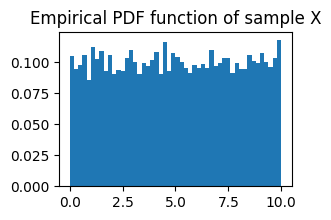

In [68]:
plt.hist(T(theta,10000),bins=50,density=True)
plt.title("Empirical PDF function of sample X")
plt.gcf().set_size_inches(3,2)
plt.show()

##### Theta estimation
- In the example below we use the $\textbf{ error() }$ function defined earlier to estimate the parameter $\theta $:

Theta = 10
Theta estimator: <function Max at 0x000001F5E2675510>
MSE: 5.81649238563254e-06


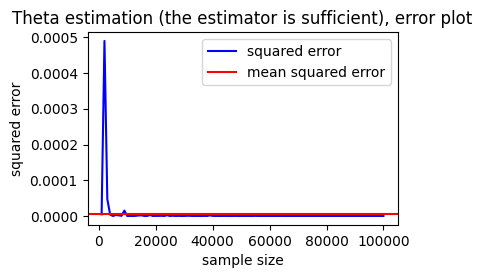

The estimator <function Max at 0x000001F5E2675510> is sufficient.


In [71]:
plt.gcf().set_size_inches(4,2.5)
plt.xlabel("sample size")
plt.ylabel("squared error")
mse = error(theta,Max, T)
plt.legend(loc=1)
plt.title("Theta estimation (the estimator is sufficient), error plot")
plt.show()
if (mse<Lambda):
    success("The estimator %s is sufficient."%Max)
else:
    fail("The estimator %s is not sufficient."%Max)

- $\text{Now let's estimate } \theta \text{ using a different statistics function }- \small{\textbf{Mean(X)}}$

Theta = 10
Theta estimator: <function Mean at 0x000001F5E1EF15A0>
MSE: 25.000415469126352


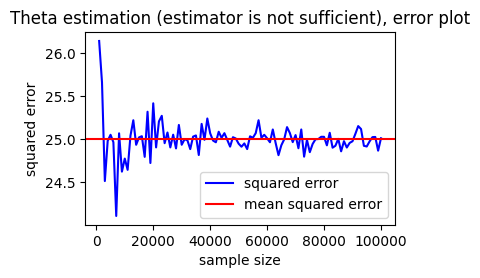

The estimator <function Mean at 0x000001F5E1EF15A0> is not sufficient.


In [72]:
plt.gcf().set_size_inches(4,2.5)
plt.xlabel("sample size")
plt.ylabel("squared error")
mse = error(theta,Mean, T)
plt.legend(loc=4)
plt.title("Theta estimation (estimator is not sufficient), error plot")
plt.show()
if (mse<Lambda):
    success("The estimator %s is sufficient."%Mean)
else:
    fail("The estimator %s is not sufficient."%Mean)

##### 7. Conclusions
1. The Null hypothesis is true:
  - $\text{H0}$: $\space X \text{ ~ } \textit{Unif }[0, \theta]$
  - $\text{H0}$: $\space\textbf{Max(X)}\equiv X_{n:n}\text{ is a sufficient statistics for the parameter }\theta$
2. The $\small{\textbf{Kolmogorov-Smirnov}}$ test confirmed, that the distribution of sample X is equivalent to $\textit{Unif }[0, \theta]$ with p-value=0.05 <=> 95 percentile
3. $\textbf{Max(X)}$ $\equiv X_{n:n}$ => $X_{n:n}$ is a sufficient statistics function for the parameter $\theta$
4. Random sample generator $T(\theta, n)$ generates simple random samples for the distribution $\textit{Unif }[0, \theta]$
5. Statistical Model:
  - $(X,\{P_{\theta}, \theta \in \Theta\})$
    - X = $[ 0,\space \theta]$
    - $\theta = 10$; $\Theta = \mathbb{R}$
    - $P_{\theta} \textit{ ~ Unif}\space(0, \theta)$
    
<br><br><br><br>